In [13]:
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import random
import torch

import sys
sys.path.append(r'c:\Users\antoi\Documents\GitHub\Fruits')


from Scripts.load_data import *

In [15]:
# Dataset parameters

data_directory = "../Data/Augmented Image"  # Path to your data
batch_size = 32
val_percentage = 0.2  # 20% for validation
test_percentage = 0.1  # 10% for testing

# Load datasets
train_loader, val_loader, test_loader = load_and_split_data(data_directory, batch_size, val_percentage, test_percentage)

# Combine all datasets into one for analysis purposes
all_data = [data for dl in [train_loader, val_loader, test_loader] for data in dl]


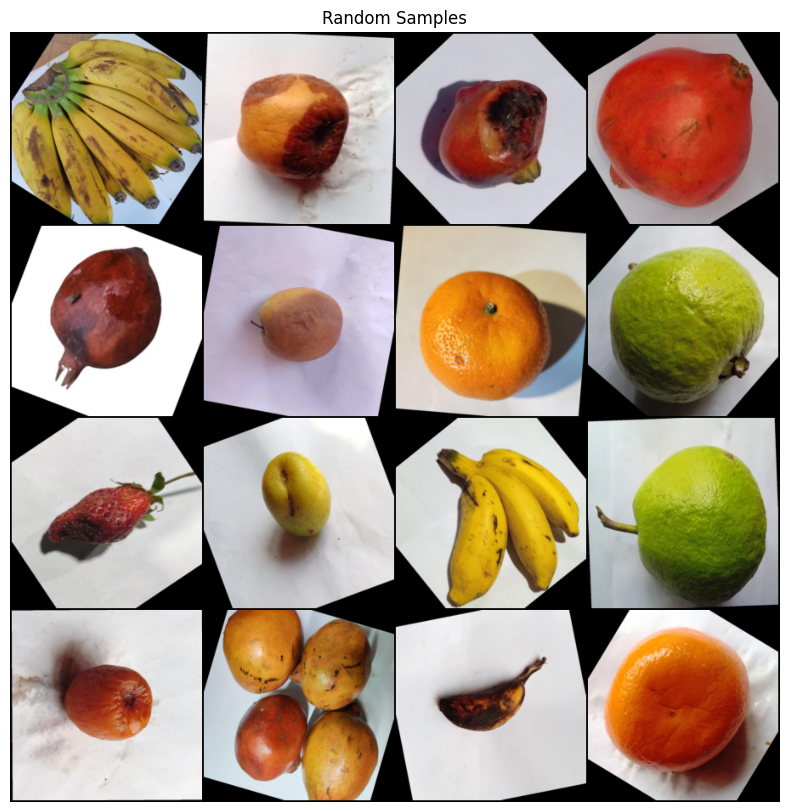

In [16]:
def show_random_samples(data, num_samples=16):
    """
    Display random samples from the dataset.

    Args:
    - data (list): List of (image, label) tuples.
    - num_samples (int): Number of samples to display.
    """
    idxs = random.sample(range(len(data)), num_samples)
    
    images, labels = zip(*[data[i] for i in idxs])
    
    image_list = []

    for img in images:
        if img.ndimension() == 4:  # Si l'image est un batch de plusieurs images
            image_list.append(img[0])  # Récupère juste la première image du batch
        else:
            image_list.append(img)  # Si c'est déjà une image seule, on la garde

    images = torch.stack(image_list)

    # Créer une grille d'images
    grid = make_grid(images, nrow=4)

    # Afficher les images
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0))  # Convertir de CHW à HWC
    plt.title("Random Samples")
    plt.axis("off")
    plt.show()

show_random_samples(all_data)